In [ ]:
!nvidia-smi

Sun Jan  8 15:48:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [ ]:
!pip install matplotlib==3.1.1


In [ ]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import re
import csv
import re
import numpy as np
import distance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import pickle





from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from bs4 import BeautifulSoup


import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
print(os.listdir("/content/drive/MyDrive/unzipped"))

['sample_submission.csv', 'train.csv', 'test.csv', 'glove.6B.200d.txt.zip', 'Stack Overflow', 'glove.6B.200d.txt']


In [ ]:
# Importing the Quora dataset
quora_df = pd.read_csv("/content/drive/MyDrive/unzipped/train.csv")

# Importing duplicated questions - stack overflow dataset
stack_data_dup = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_duplicate.csv')

# # Importing non-duplicated questions Part by Part- stack overflow dataset
stack_data_non_dup_p1 = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_Part1.csv')
stack_data_non_dup_p2 = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_Part2.csv')



# *   Data Cleaning - Quora Dataset

Working on the Quora dataset first, performing EDA on the Quora dataset alone

In [ ]:
quora_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
quora_df.shape

(404290, 6)

In [ ]:
quora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# import matplotlib 
# print('matplotlib: {}'.format(matplotlib.__version__))

[Text(0, 0, 'non-duplicate'), Text(0, 0, 'duplicate')]

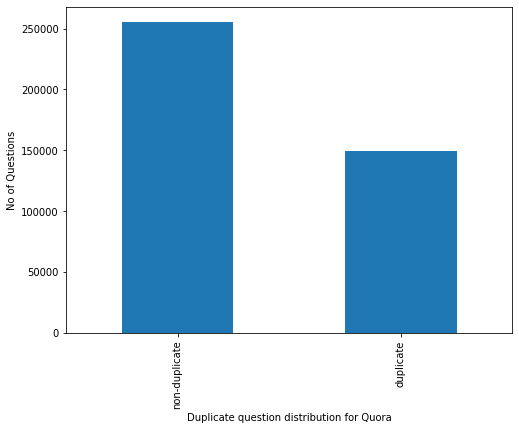

In [ ]:
ax = quora_df['is_duplicate'].value_counts().plot(kind='bar',figsize=(8, 6))
x_labels = ['non-duplicate', 'duplicate']

ax.set_xlabel('Duplicate question distribution for Quora')
ax.set_ylabel('No of Questions')
# ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xticklabels(x_labels)

In [ ]:
# Function to get the missing values present in the columns

def get_missing_values(df):
  print("Missing Values\n--------------")
  for col in df.columns:
    print("Column " + col + ' -- ' + str(sum(df[col].isna())))

get_missing_values(quora_df)

Missing Values
--------------
Column id -- 0
Column qid1 -- 0
Column qid2 -- 0
Column question1 -- 1
Column question2 -- 2
Column is_duplicate -- 0


In [ ]:
quora_df.dropna(inplace=True)

In [ ]:
get_missing_values(quora_df)

Missing Values
--------------
Column id -- 0
Column qid1 -- 0
Column qid2 -- 0
Column question1 -- 0
Column question2 -- 0
Column is_duplicate -- 0


In [ ]:
# Distribution of duplicate and non-duplicate questions

quora_df[quora_df['is_duplicate']==1].shape,quora_df[quora_df['is_duplicate']==0].shape,

((149263, 6), (255024, 6))

In [ ]:
# Making the duplicate and non-duplicate questions even
is_duplicate = quora_df[quora_df['is_duplicate']==1]
not_duplicate = quora_df[quora_df['is_duplicate']==0].sample(149263)

In [ ]:
len(is_duplicate),len(not_duplicate)

(149263, 149263)

In [ ]:
quora_data = pd.concat([is_duplicate,not_duplicate])

In [ ]:
quora_data.shape

(298526, 6)

In [ ]:
# Resetting the index and shuffling all the rows present in the dataset 
quora_data = quora_data.sample(frac=1).reset_index(drop=True)
quora_data.shape

(298526, 6)

In [ ]:
quora_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,181370,19290,3790,Which is the best joke you have ever heard?,What is funniest joke you've ever heard?,1
1,277244,396309,396310,Is Zerodha safe for trading?,Can I trust zerodha for trading?,1
2,178577,274236,274237,Is it fair to say the that United States is cu...,Why do some secularists support a ban on weari...,0
3,50717,28536,90061,Can you be in love with more than one person a...,İs it possible to be in love with 2 people at ...,1
4,185898,283690,283691,I have -0.5 cyl power but lenskart has sent me...,Is a 12 year old socially fit for 5th grade?,0


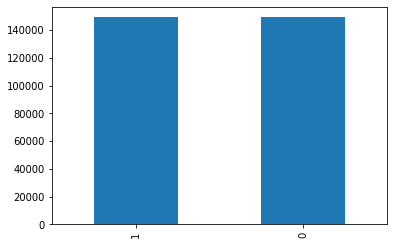

In [ ]:
quora_data.is_duplicate.value_counts().plot(kind='bar')

In [ ]:
# Checking how many questions are repeated

def get_repeated_questions(df,q1_id_column,q2_id_column):
  # Fuctions displays how many times the questions were repeated in the dataset. 

  all_qid = pd.Series(df[q1_id_column].tolist() + df[q2_id_column].tolist())

  print('Number of unique questions by ID - ',np.unique(all_qid).shape[0])

  x = all_qid.value_counts()>1
  print('Number of duplicate questions getting repeated by ID - ',x[x].shape[0])

get_repeated_questions(quora_data,'qid1','qid2')

Number of unique questions by ID -  390926
Number of duplicate questions getting repeated by ID -  79329


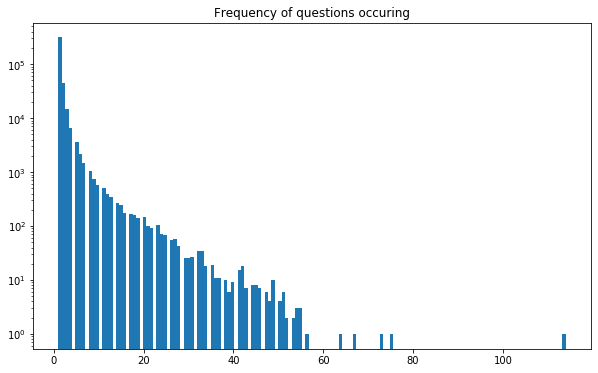

In [ ]:
# Plotting the histogram for questions that are occuring - how many times one questions has occured in the dataset
import matplotlib.pyplot as plt 

def plot_dup_ques_hist(df,q1_id_column,q2_id_column):
  all_qid = pd.Series(df[q1_id_column].tolist() + df[q2_id_column].tolist())

  plt.figure(figsize=(10,6))
  plt.hist(all_qid.value_counts().values,bins=150)
  plt.yscale('log')
  plt.title("Frequency of questions occuring")
  plt.show()

plot_dup_ques_hist(quora_data,'qid1','qid2')

In [ ]:
# There is one question in the dataset that has been repeated around ~160 times. 

# *   Data Cleaning - Stack Overflow Dataset

Working on the Stack Overflow dataset second

In [ ]:
# Concatenating all the duplicate questions of Stack Overflow into one

stack_data_non_dup = pd.concat([stack_data_non_dup_p1,stack_data_non_dup_p2],axis=1)

In [ ]:
# Checking missing values in the non-duplicate questions of StackOverflow dataset

get_missing_values(stack_data_non_dup)

Missing Values
--------------
Column OId -- 0
Column OTitle -- 0
Column OBody -- 0
Column OTags -- 0
Column DId -- 0
Column DTitle -- 0
Column DBody -- 0
Column DTags -- 0
Column isDuplicate -- 0


In [ ]:
stack_data_non_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OId          50000 non-null  int64 
 1   OTitle       50000 non-null  object
 2   OBody        50000 non-null  object
 3   OTags        50000 non-null  object
 4   DId          50000 non-null  int64 
 5   DTitle       50000 non-null  object
 6   DBody        50000 non-null  object
 7   DTags        50000 non-null  object
 8   isDuplicate  50000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


In [ ]:
stack_data_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OId          50000 non-null  int64 
 1   OTitle       50000 non-null  object
 2   OBody        50000 non-null  object
 3   OTags        50000 non-null  object
 4   DId          50000 non-null  int64 
 5   DTitle       50000 non-null  object
 6   DBody        50000 non-null  object
 7   DTags        50000 non-null  object
 8   isDuplicate  50000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


In [ ]:
# Combing both the duplicate and non-duplicate questions of stackocerflow into one 
stack_data = pd.concat([stack_data_non_dup,stack_data_dup])

In [ ]:
# Shuffling all the rows in the dataset

stack_data = stack_data.sample(frac = 1,random_state=101)

In [ ]:
stack_data.isDuplicate.value_counts()

1    50000
0    50000
Name: isDuplicate, dtype: int64

Text(0, 0.5, 'No of Questions')

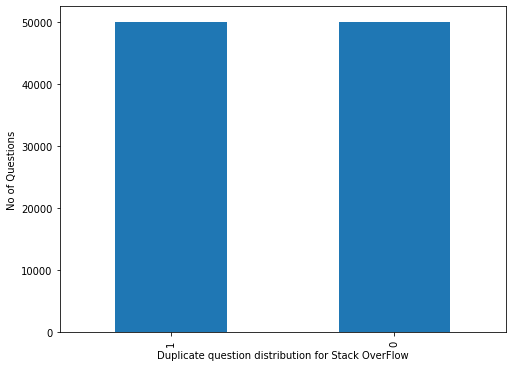

In [ ]:
ax = stack_data['isDuplicate'].value_counts().plot(kind='bar',figsize=(8, 6))
x_labels = ['non-duplicate', 'duplicate']


ax.set_xlabel('Duplicate question distribution for Stack OverFlow')
ax.set_ylabel('No of Questions')
# ax.bar_label(ax.containers[0], label_type='edge')

In [ ]:
stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
6324,4616202,Self-references in object literals / initializers,<p>Is there any way to get something like the ...,<javascript><object-literal>,4858931,reference variable in object literal?,<p>say I have</p>\n\n<pre><code>myfunc({\n va...,<javascript><object-literal>,1
2881,3242937,Ubuntu and Ruby version,<p>I have Ruby versions 1.8.7 and 1.9.1 on Ubu...,<ruby><ubuntu>,3243088,Installing RVM (Ruby Version Manager),<p>Can someone please translate this into mana...,<ruby>,1
10647,4945177,Printing from a Windows Service,<p>How can I printing a document on a specific...,<c#><printing><windows-services>,7990,Printing from a .NET Service,<p>I am working on a project right now that in...,<c#><.net><windows-services><printing>,1
42046,2656606,Can a file be opened simultaneously under SIlv...,<p>Silverlight uses an IsolatedStorageFileStre...,<c#><silverlight>,7800144,issue reading in data,<p>I am having trouble reading data from a fil...,<c++><fstream>,0
9912,2533249,Nested foreach in PHP produces different resul...,<p>I'm having problems to iterate twice on the...,<php><foreach>,7691790,Renaming project directory in VS 2010,<p>What would be a sequence of operations to r...,<visual-studio-2010>,0


### The stack overflow dataset is not clean compared to the Quora dataset. This dataset requires cleaning and we will aim to format and standardize both datasets into one format.

### We have a lot of data in both the datasets. But because of the memory limitations in colab. We will consider 40-50% of the dataset and perform the cleaning. If required, we can consider more data later. 

In [ ]:
# We will consider 20,000 records from the Stack Overflow dataset randomly
basic_stack_data = stack_data.sample(20000,random_state=101)

In [ ]:
basic_stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,<p>Here is an example of the string I'm matchi...,<regex>,22444,My regex is matching too much. How do I make i...,<p>I have this gigantic ugly string:</p>\n<pre...,<regex>,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,<p>Just downloaded the new IE11 development ve...,<internet-explorer>,17871124,"How to bring back ""Browser mode"" in IE11?",<p><strong>UPDATE</strong>: The old question a...,<cross-browser><ie-developer-tools><internet-e...,1
27053,18232254,NSData in base 10,<p>Is it possible to NSLog NSData in base 10. ...,<ios><objective-c><c>,6626038,Printing NSData using NSLog,<p>How can I print the contents of an NSData o...,<iphone><objective-c>,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,<p>I thought <code>@ViewScoped</code> was supp...,<jsf><jakarta-ee><ejb><view-scope>,5541813,@ViewScoped calls @PostConstruct on every post...,<p>This doesn't seem right. I was doing some c...,<jsf><jsf-2><constructor><view-scope><postcons...,1
3808,2509229,"a ""+"" sign in email address","<p>I need to submit an email address with a ""<...",<iphone><objective-c><iphone-sdk-3.0>,7671327,Team Foundation services are not available fro...,<p>We are working with Visual Studio 2010 and ...,<visual-studio-2010><visual-studio-2012><tfs>,0


In [ ]:
## There are two columns for tags, OTags and DTags. Both contain several tags and needs to be cleaned and converted to texts

def remove_tags(text):
  return text.replace("<","").replace(">"," ")[:-1]

In [ ]:
## Calling the remove tags function and apply it on the two Tags columns

basic_stack_data['OTags'] = basic_stack_data.OTags.apply(remove_tags)
basic_stack_data['DTags'] = basic_stack_data.DTags.apply(remove_tags)

In [ ]:
basic_stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,<p>Here is an example of the string I'm matchi...,regex,22444,My regex is matching too much. How do I make i...,<p>I have this gigantic ugly string:</p>\n<pre...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,<p>Just downloaded the new IE11 development ve...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",<p><strong>UPDATE</strong>: The old question a...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,<p>Is it possible to NSLog NSData in base 10. ...,ios objective-c c,6626038,Printing NSData using NSLog,<p>How can I print the contents of an NSData o...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,<p>I thought <code>@ViewScoped</code> was supp...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,<p>This doesn't seem right. I was doing some c...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address","<p>I need to submit an email address with a ""<...",iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,<p>We are working with Visual Studio 2010 and ...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
## Cleaning the body of the questions from this step. 

# Lemmatize words
def get_pos_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        # Default lemmatization
        return wordnet.NOUN

In [ ]:
## Things to be replaced and removed

regex = [
    r'<[^>]+>', #HTML tags
    r'@(\w+)', # @-mentions
    r"#(\w+)", # hashtags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'[^0-9a-z #+_\\r\\n\\t]', #BAD SYMBOLS
]

REPLACE_URLS = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
REPLACE_HASH = re.compile(r'#(\w+)')
REPLACE_AT = re.compile(r'@(\w+)')
REPLACE_HTML_TAGS = re.compile(r'<[^>]+>')
REPLACE_BY = re.compile(r"[^a-z0-9\-]")

In [ ]:
STOP_WORDS = set(stopwords.words('english'))

In [ ]:
lemmatizer = WordNetLemmatizer()

# User defined fucntion to replace and eliminate redundant values and clean the texts
def clean_data(text):
  text = text.lower()
  text = REPLACE_HTML_TAGS.sub(' ',text)
  text = REPLACE_URLS.sub('', text)
  text = REPLACE_HASH.sub('', text)
  text = REPLACE_AT.sub('', text)
  text = REPLACE_BY.sub(' ', text)

  text = " ".join(lemmatizer.lemmatize(word.strip(), get_pos_tag(pos_tag([word.strip()])[0][1])) \
                  for word in text.split() if word not in STOP_WORDS and len(word)>3)

  return text

In [ ]:
## Applying the function to all the questions present in the original body column in order to check well the cleaning processed 
basic_stack_data['OBody'] = basic_stack_data['OBody'].apply(clean_data)

In [ ]:
basic_stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,<p>I have this gigantic ugly string:</p>\n<pre...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",<p><strong>UPDATE</strong>: The old question a...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,<p>How can I print the contents of an NSData o...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,<p>This doesn't seem right. I was doing some c...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,<p>We are working with Visual Studio 2010 and ...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
## Applying the function to all the questions present in the duplicate body column in order to check well the cleaning processed 
basic_stack_data['DBody'] = basic_stack_data['DBody'].apply(clean_data)

In [ ]:
## Add the following piece of code in the cleaning process, this steps first removes all the extra ---- presents in the data and also removes the
## whitespaces present in the data.

def rm_whitespace_hyphen(value):
  return ' '.join(value.replace("-","").split())

In [ ]:
basic_stack_data['OBody'] = basic_stack_data['OBody'].apply(rm_whitespace_hyphen)
basic_stack_data['DBody'] = basic_stack_data['DBody'].apply(rm_whitespace_hyphen)

In [ ]:
basic_stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,gigantic ugly string j0000000 transaction a000...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",update question applies ie11 preview browser m...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,print content nsdata object use nslog void pos...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,seem right cleanup code notice every ajax requ...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,work visual studio 2010 team foundation server...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
# Since the dataset is taken from stackoverflow, the body of the questions consists of the code blocks. And we don't need the 
# code block to process and perform NLP. Hence we will be eliminating the code blocks

def fix_html(html):
    soup = BeautifulSoup(html)

    for a in soup.findAll('code'):
        a.replaceWith("CODE")

    return (soup.get_text()).replace("\\n",'\n')

In [ ]:
basic_stack_data['OBody'] = basic_stack_data['OBody'].apply(lambda x: fix_html(x))
basic_stack_data['DBody'] = basic_stack_data['DBody'].apply(lambda x: fix_html(x))

In [ ]:
# We need to see how many characters are present in the body of questions. since this is the body, the user might've input alot
# of information which will not be required for processing. 

basic_stack_data['OBody_len'] = basic_stack_data['OBody'].str.len()
basic_stack_data['DBody_len'] = basic_stack_data['DBody'].str.len()

In [ ]:
# Function to get the aggregation of the number of characters present in the dataset. 

def get_characters_agg(df,col_name):
  print('Minimum characters present in Question - ',df[col_name].min())
  print('Maximum characters present in Question - ',df[col_name].max())
  print('Average num of characters in Question - ', df[col_name].mean())

In [ ]:
# For Orignal Questions of stack overflow
get_characters_agg(basic_stack_data,'OBody_len')

Minimum characters present in Question -  0
Maximum characters present in Question -  23764
Average num of characters in Question -  466.27725


In [ ]:
# For Duplicate Questions of stack overflow
get_characters_agg(basic_stack_data,'DBody_len')

Minimum characters present in Question -  8
Maximum characters present in Question -  22484
Average num of characters in Question -  494.72665


In [ ]:
# Plotting a displot by cosidering the number of characters present in the question

def plot_no_of_characters(df,col_name,binsize=2000):
  g = sns.displot(df[col_name]).set(title='Analysis of the no of characters')
  g.set(xlim=(0, binsize))

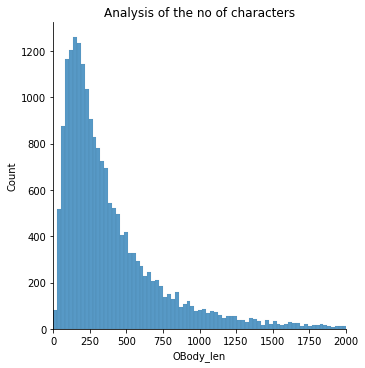

In [ ]:
plot_no_of_characters(basic_stack_data,'OBody_len')

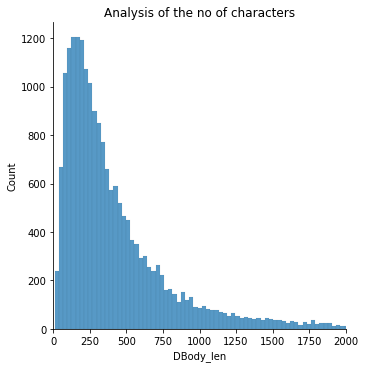

In [ ]:
plot_no_of_characters(basic_stack_data,'DBody_len')


1.   It is seen from the above 2 plots and stats that most of the questions contains around 250 characters in the boody of the question.

2.   For our analyis we will consider first 300 characters from the questions body.

In [ ]:
basic_stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate,OBody_len,DBody_len
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,gigantic ugly string j0000000 transaction a000...,regex,1,271,359
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",update question applies ie11 preview browser m...,cross-browser ie-developer-tools internet-expl...,1,180,678
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,print content nsdata object use nslog void pos...,iphone objective-c,1,91,606
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,seem right cleanup code notice every ajax requ...,jsf jsf-2 constructor view-scope postconstruct,1,1203,173
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,work visual studio 2010 team foundation server...,visual-studio-2010 visual-studio-2012 tfs,0,1122,414


### Making use of the Title, body and Hashtags from the data to form a new question.



1.   Unlike in the Quora dataset, the main content of the question might not be present in the title. There is a body column which consists of the complete description of the dataset.
2.   And there is another column called hashtags, this could play a main feature file in contributing to the models accuracy. Two seperate questions if not guessed by the title, can be verified if they are present under the same domain (making use of the hashtags)

We will be using all these three columns- Title, Body, Hashtags of both the categories (orignal and duplicate)questions and form one unique question for each category.



### The body of the questions can be huge, and hence to limit the overall size of the question. We can use the complete title, append all the hashtags and later fix a number of characters to be appended from the body of the question.

### From the above distplots and analysis, we could see that the average lies somewhere between 250 to 500. And we consider 300 to be the number of characters that wouuld be appended from the body of both the duplicate and original question.




In [ ]:
fixed_len_for_body = 300

# For original questions
def appending_original_data(row):
  # checking if the size of the body is > our fixed length size i.e, 300
  if int(row['OBody_len']) > fixed_len_for_body:
    final_len = fixed_len_for_body
  else:
    final_len = int(row['OBody_len'])

  # appending the title, tags and first 300 characters from the body of the question
  data = row['OTitle'] + ' ' + row['OTags'] + ' ' + row['OBody'][:fixed_len_for_body]
  return data

# For duplicate questions
def appending_duplicate_data(row):
  if int(row['DBody_len']) > fixed_len_for_body:
    final_len = fixed_len_for_body
  else:
    final_len = int(row['DBody_len'])
    
  data = row['DTitle'] + ' ' + row['DTags'] + ' ' + row['DBody'][:fixed_len_for_body]
  return data

In [ ]:
# Merging the OTitle, OBody and OTags into a single column inorder to grab all the features

basic_stack_data['question1'] = basic_stack_data.apply(lambda x: appending_original_data(x),axis=1)
basic_stack_data['question2'] = basic_stack_data.apply(lambda x: appending_duplicate_data(x),axis=1)

In [ ]:
# Size of the new questiosn 
basic_stack_data['q1len'] = basic_stack_data['question1'].str.len()
basic_stack_data['q2len'] = basic_stack_data['question2'].str.len()

In [ ]:
get_characters_agg(basic_stack_data,'q1len')

Minimum characters present in Question -  38
Maximum characters present in Question -  506
Average num of characters in Question -  304.0369


In [ ]:
get_characters_agg(basic_stack_data,'q2len')

Minimum characters present in Question -  39
Maximum characters present in Question -  502
Average num of characters in Question -  312.7378


In [ ]:
# Taking 20k records from the Quora dataset
basic_quora_data = quora_data.sample(20000,random_state=101)

In [ ]:
basic_stack_data.info(),basic_quora_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 20955 to 46704
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OId          20000 non-null  int64 
 1   OTitle       20000 non-null  object
 2   OBody        20000 non-null  object
 3   OTags        20000 non-null  object
 4   DId          20000 non-null  int64 
 5   DTitle       20000 non-null  object
 6   DBody        20000 non-null  object
 7   DTags        20000 non-null  object
 8   isDuplicate  20000 non-null  int64 
 9   OBody_len    20000 non-null  int64 
 10  DBody_len    20000 non-null  int64 
 11  question1    20000 non-null  object
 12  question2    20000 non-null  object
 13  q1len        20000 non-null  int64 
 14  q2len        20000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 297020 to 215115
Data columns (total 6 columns):
 #   Column        Non-Nul

(None, None)

First approach is to try machine learning algorithms on a 
sample of 20k records from each quora and stackoverflow without doing any Feature Engineering. Just to check how many accuracy comes with basic ML algorithm with minimal tuning


In [ ]:
basic_stack_data.columns

Index(['OId', 'OTitle', 'OBody', 'OTags', 'DId', 'DTitle', 'DBody', 'DTags',
       'isDuplicate', 'OBody_len', 'DBody_len', 'question1', 'question2',
       'q1len', 'q2len'],
      dtype='object')

In [ ]:
basic_quora_data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
temp_df1 = basic_stack_data[['question1', 'question2','isDuplicate']]
temp_df2 = basic_quora_data[['question1', 'question2', 'is_duplicate']]

In [ ]:
temp_df2.columns = ['question1', 'question2','isDuplicate']

In [ ]:
combined_data = temp_df1.append(temp_df2)

In [ ]:
### Check Point 1 ###
# combined_data.to_pickle('combined_data_CP1.pkl')
combined_data = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Deepak Dissertation/pickles/combined_data_CP1.pkl")  

In [ ]:
# Shuffling all the questions from stackoverflow and Quora
combined_data = combined_data.sample(frac = 1,random_state=101)

In [ ]:
# Merge all the question into one list
questions = list(combined_data['question1']) + list(combined_data['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= combined_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= combined_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

#temp_df will have 6000 numerical features now, 3000 for question1 and another 3000 for question2

(40000, 6000)

In [ ]:
temp_df['isDuplicate'] = combined_data['isDuplicate']

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,isDuplicate
18941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
252821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=101)

In [ ]:
# Creating a basic Random Forest Classifier and verifying how it performs without much feature engineering and just on Numberical Features

random_model = RandomForestClassifier()
random_model.fit(X_train,y_train)

y_pred = random_model.predict(X_test)

RandomForestClassifier()

In [ ]:
pickle.dump(random_model, open('rf_model_v1.pkl', 'wb'))

In [ ]:
## Printing all the Metrics scores

def print_metrics(y_test,y_pred,modeltype='Model'):
  print("The accuracy score for duplicate question detection using "+modeltype+" is %f\n" %accuracy_score(y_test,y_pred))
  print("The precision score for duplicate question detection using "+modeltype+" is %f\n" %precision_score(y_test,y_pred))
  print("The recall score for duplicate question detection using "+modeltype+" is %f\n" %recall_score(y_test,y_pred))
  print("The f1 score for duplicate question detection using "+modeltype+" is %f\n" %f1_score(y_test,y_pred))
  cf_matrix = confusion_matrix(y_test,y_pred)
  print(cf_matrix)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')


The accuracy score for duplicate question detection using Random Forest is 0.771000

The precision score for duplicate question detection using Random Forest is 0.808414

The recall score for duplicate question detection using Random Forest is 0.710645

The f1 score for duplicate question detection using Random Forest is 0.756383

[[3324  674]
 [1158 2844]]


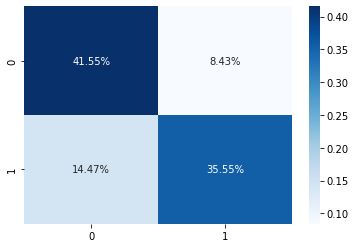

In [ ]:
print_metrics(y_test,y_pred,modeltype='Random Forest')

The accuracy score for duplicate question detection using XGBClassifier is 0.717750

The precision score for duplicate question detection using XGBClassifier is 0.797205

The recall score for duplicate question detection using XGBClassifier is 0.584458

The f1 score for duplicate question detection using XGBClassifier is 0.674452

[[3403  595]
 [1663 2339]]


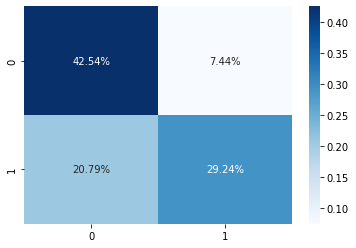

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

print_metrics(y_test,y_pred,modeltype='XGBClassifier')

The accuracy score for duplicate question detection using decision_tree_clf is 0.713500

The precision score for duplicate question detection using decision_tree_clf is 0.719569

The recall score for duplicate question detection using decision_tree_clf is 0.700150

The f1 score for duplicate question detection using decision_tree_clf is 0.709726

[[2906 1092]
 [1200 2802]]


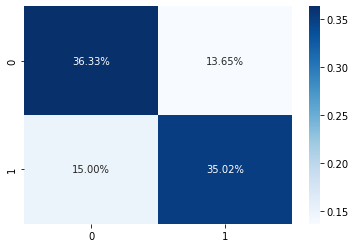

In [ ]:
## Decision Tree Classifier model


decision_tree_clf = DecisionTreeClassifier(random_state=0)

decision_tree_clf.fit(X_train,y_train)
y_pred = decision_tree_clf.predict(X_test)

print_metrics(y_test,y_pred,modeltype='decision_tree_clf')

After reading solutions from the literature papers, it is suggested to apply feature engineering and create more features in order to gain higher accuarcy. Moving from here, we will apply feature engineering and create more features for the dataset

In [ ]:
# Feature engineering to contruct new features 

# Storing the length of question 1 and question 2
combined_data['q1len'] = combined_data['question1'].str.len()
combined_data['q2len'] = combined_data['question2'].str.len()

In [ ]:
combined_data.head()

,question1,question2,isDuplicate,q1len,q2len
18941,How to make an object go to a higher layer htm...,What's the precedence of ruby's method call ru...,0,179,292
147220,What is absolute 0?,"What is ""absolute"" in this world?",0,19,33
40444,An unexpected output for C++ code.Can someone ...,Undefined behavior and sequence points c++ und...,1,359,386
252821,How is placement in uiet in mechanical engener...,Who is an offensive player in the NFL with a l...,0,50,76
73461,Which data plan would be suitable for me (plea...,"I feel that people don't like me, and have alw...",0,62,138


In [ ]:
# Storing the no of words present in the questions 
combined_data['q1_no_words'] = combined_data['question1'].apply(lambda row: len(row.split(" ")))
combined_data['q2_no_words'] = combined_data['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
# Function that fetches the common words between two questions

def fetch_common_words(row,col1,col2):
    w1 = set(map(lambda word: word.lower().strip(), row[col1].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row[col2].split(" ")))    
    return len(w1 & w2)

In [ ]:
combined_data['common_words'] = combined_data.apply(fetch_common_words,args=('question1','question2'), axis=1)
combined_data.head()

,question1,question2,isDuplicate,q1len,q2len,q1_no_words,q2_no_words,common_words
18941,How to make an object go to a higher layer htm...,What's the precedence of ruby's method call ru...,0,179,292,31,39,2
147220,What is absolute 0?,"What is ""absolute"" in this world?",0,19,33,4,6,2
40444,An unexpected output for C++ code.Can someone ...,Undefined behavior and sequence points c++ und...,1,359,386,54,54,12
252821,How is placement in uiet in mechanical engener...,Who is an offensive player in the NFL with a l...,0,50,76,8,16,2
73461,Which data plan would be suitable for me (plea...,"I feel that people don't like me, and have alw...",0,62,138,11,28,0


In [ ]:
# Total no of words present in both the questions
def total_words(row,col1,col2):
    w1 = set(map(lambda word: word.lower().strip(), row[col1].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row[col2].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
combined_data['total_words'] = combined_data.apply(total_words, args=('question1','question2'), axis=1)
combined_data.head()

,question1,question2,isDuplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words
18941,How to make an object go to a higher layer htm...,What's the precedence of ruby's method call ru...,0,179,292,31,39,2,61
147220,What is absolute 0?,"What is ""absolute"" in this world?",0,19,33,4,6,2,10
40444,An unexpected output for C++ code.Can someone ...,Undefined behavior and sequence points c++ und...,1,359,386,54,54,12,84
252821,How is placement in uiet in mechanical engener...,Who is an offensive player in the NFL with a l...,0,50,76,8,16,2,22
73461,Which data plan would be suitable for me (plea...,"I feel that people don't like me, and have alw...",0,62,138,11,28,0,35


In [ ]:
combined_data['shared_words'] = round(combined_data['common_words']/combined_data['total_words'],2)
combined_data.head()

,question1,question2,isDuplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,shared_words
18941,How to make an object go to a higher layer htm...,What's the precedence of ruby's method call ru...,0,179,292,31,39,2,61,0.03
147220,What is absolute 0?,"What is ""absolute"" in this world?",0,19,33,4,6,2,10,0.20
40444,An unexpected output for C++ code.Can someone ...,Undefined behavior and sequence points c++ und...,1,359,386,54,54,12,84,0.14
252821,How is placement in uiet in mechanical engener...,Who is an offensive player in the NFL with a l...,0,50,76,8,16,2,22,0.09
73461,Which data plan would be suitable for me (plea...,"I feel that people don't like me, and have alw...",0,62,138,11,28,0,35,0.00


Doing some basic analysis for the newly created features in the dataset inorder 
to understand how the new data looks.

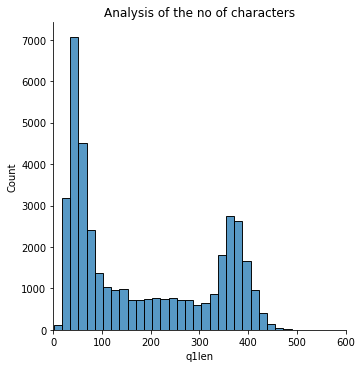

In [ ]:
plot_no_of_characters(combined_data,'q1len',600)

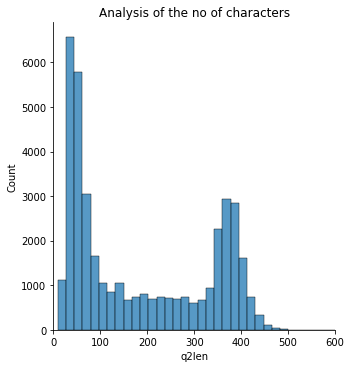

In [ ]:
plot_no_of_characters(combined_data,'q2len',600)

In [ ]:
get_characters_agg(combined_data,'q1len')
print("\n")
get_characters_agg(combined_data,'q2len')

Minimum characters present in Question -  1
Maximum characters present in Question -  506
Average num of characters in Question -  181.063625


Minimum characters present in Question -  9
Maximum characters present in Question -  1151
Average num of characters in Question -  185.5824


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


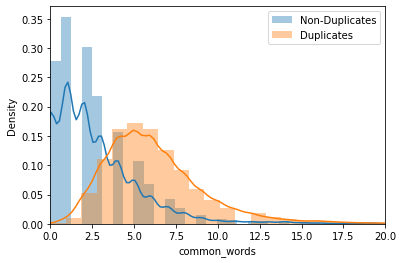

In [ ]:
# Plotting a chart for common words in the Data

sns.distplot(combined_data[combined_data['isDuplicate'] == 0]['common_words'],label='Non-Duplicates')
sns.distplot(combined_data[combined_data['isDuplicate'] == 1]['common_words'],label='Duplicates')
plt.legend()
plt.xlim(0, 20)
plt.show()

From the above chart it is clear that if there are less than 0.4 - 4 common words between the questions, then the chances of that being a non-duplicate question is very high.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

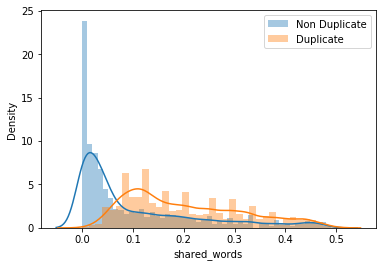

In [ ]:
# Plotting a displot for both the questions that share the words 

sns.distplot(combined_data[combined_data['isDuplicate'] == 0]['shared_words'],label='Non Duplicate')
sns.distplot(combined_data[combined_data['isDuplicate'] == 1]['shared_words'],label='Duplicate')
plt.legend()
plt.show()

If the word share between the two questions is > 0.1 (1 words), then the chances of that being a duplicate question is very high else it is normally a dnon-duplicate question

In [ ]:
### Check Point 3 ###
# combined_data.to_pickle('combined_data_CP3.pkl')

## To load the pickle file
combined_data = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Deepak Dissertation/pickles/combined_data_CP3.pkl")  

If the word share between the two questions is > 0.2 (2 words), then the chances of that being a duplicate question is very high else it is normally a dnon-duplicate question

In [ ]:
all_questions = list(combined_data['question1']) + list(combined_data['question2'])

In [ ]:
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(all_questions).toarray(),2)

In [ ]:
# We retain the index of the dataset, because later while merging the numerical features we will need the index as reference for concatenation
temp_df1 = pd.DataFrame(q1_arr, index= combined_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= combined_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)


In [ ]:
temp_df.shape

(40000, 6000)

In [ ]:
# Appending the target column to the remaining feature columns

feature_columns = ['isDuplicate','q1len', 'q2len',
       'q1_no_words', 'q2_no_words', 'common_words', 'total_words',
       'shared_words']


combined_data_features = pd.concat([combined_data[feature_columns], temp_df], axis=1)

In [ ]:
combined_data_features.head()

,isDuplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,shared_words,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
18941,0,179,292,31,39,2,61,0.03,0,0,...,0,0,0,0,0,0,0,0,0,0
147220,0,19,33,4,6,2,10,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
40444,1,359,386,54,54,12,84,0.14,0,0,...,0,0,0,0,0,0,0,0,0,0
252821,0,50,76,8,16,2,22,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
73461,0,62,138,11,28,0,35,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(combined_data_features.iloc[:,1:].values,combined_data_features.iloc[:,0].values,test_size=0.2,random_state=101)

In [ ]:
random_model = RandomForestClassifier()
random_model.fit(X_train,y_train)
y_pred = random_model.predict(X_test)



RandomForestClassifier()

The accuracy score for duplicate question detection using Random Forest is 0.856875

The precision score for duplicate question detection using Random Forest is 0.833996

The recall score for duplicate question detection using Random Forest is 0.891304

The f1 score for duplicate question detection using Random Forest is 0.861698

[[3288  710]
 [ 435 3567]]


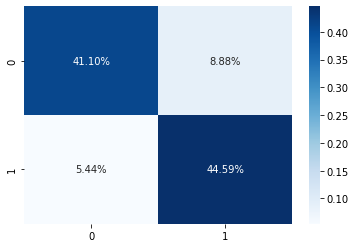

In [ ]:
print_metrics(y_test,y_pred,modeltype='Random Forest')

In [ ]:
pickle.dump(random_model, open('rf_model_v2.pkl', 'wb'))

The accuracy score for duplicate question detection using XGBClassifier is 0.831833

The precision score for duplicate question detection using XGBClassifier is 0.790751

The recall score for duplicate question detection using XGBClassifier is 0.905660

The f1 score for duplicate question detection using XGBClassifier is 0.844314

[[2255  724]
 [ 285 2736]]


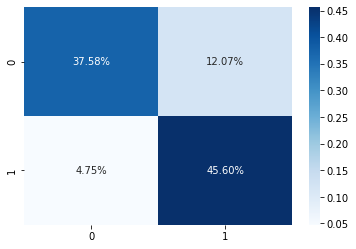

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print_metrics(y_test,y_pred,modeltype='XGBClassifier')

The accuracy score for duplicate question detection using decision_tree_clf is 0.798667

The precision score for duplicate question detection using decision_tree_clf is 0.792514

The recall score for duplicate question detection using decision_tree_clf is 0.812976

The f1 score for duplicate question detection using decision_tree_clf is 0.802614

[[2336  643]
 [ 565 2456]]


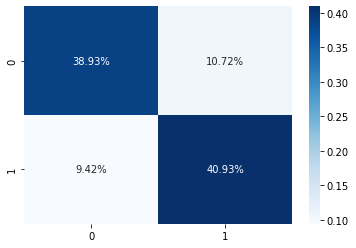

In [ ]:
## Decision Tree Classifier model

decision_tree_clf = DecisionTreeClassifier(random_state=0)

decision_tree_clf.fit(X_train,y_train)
y_pred = decision_tree_clf.predict(X_test)

print_metrics(y_test,y_pred,modeltype='decision_tree_clf')

Applying Advanced Feature Engineering from here inorder to see if that accuracy increases

In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [ ]:
token_feature_engineering = combined_data.apply(fetch_token_features, axis=1)


combined_data["common_words_min"] = list(map(lambda x: x[0], token_feature_engineering))
combined_data["common_words_max"] = list(map(lambda x: x[1], token_feature_engineering))
combined_data["common_stop_min"] = list(map(lambda x: x[2], token_feature_engineering))
combined_data["common_stop_max"]  = list(map(lambda x: x[3], token_feature_engineering))
combined_data["common_token_min"]  = list(map(lambda x: x[4], token_feature_engineering))
combined_data["common_token_max"]  = list(map(lambda x: x[5], token_feature_engineering))
combined_data["last_word_equal"] = list(map(lambda x: x[6], token_feature_engineering))
combined_data["first_word_equal"] = list(map(lambda x: x[7], token_feature_engineering))

In [ ]:
combined_data.head()

,question1,question2,isDuplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,shared_words,common_words_min,common_words_max,common_stop_min,common_stop_max,common_token_min,common_token_max,last_word_equal,first_word_equal
18941,How to make an object go to a higher layer htm...,What's the precedence of ruby's method call ru...,0,179,292,31,39,2,61,0.03,0.083333,0.062500,0.00000,0.000000,0.064516,0.051282,0,0
147220,What is absolute 0?,"What is ""absolute"" in this world?",0,19,33,4,6,2,10,0.20,0.333322,0.333322,0.99990,0.333322,0.499988,0.333328,0,1
40444,An unexpected output for C++ code.Can someone ...,Undefined behavior and sequence points c++ und...,1,359,386,54,54,12,84,0.14,0.282051,0.249999,0.00000,0.000000,0.203703,0.203703,0,0
252821,How is placement in uiet in mechanical engener...,Who is an offensive player in the NFL with a l...,0,50,76,8,16,2,22,0.09,0.000000,0.000000,0.99995,0.285710,0.249997,0.124999,0,0
73461,Which data plan would be suitable for me (plea...,"I feel that people don't like me, and have alw...",0,62,138,11,28,0,35,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0


In [ ]:
def get_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    feature_length = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return feature_length
    
    # Absolute length features
    feature_length[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    feature_length[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    feature_length[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return feature_length

In [ ]:
all_length_features = combined_data.apply(get_length_features, axis=1)

combined_data['abs_length'] = list(map(lambda x: x[0], all_length_features))
combined_data['mean_length'] = list(map(lambda x: x[1], all_length_features))
combined_data['longest_substring_ratio'] = list(map(lambda x: x[2], all_length_features))

In [ ]:
### Check Point 4 ###
# combined_data.to_pickle('combined_data_CP4.pkl')

## For reading the data set 
combined_data = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Deepak Dissertation/pickles/combined_data_CP4.pkl")  

combined_data = combined_data.sample(30000)

Visualizing the new advanced dervied features using pairplots

In [ ]:
### Resetting Index CODE - Use only if used any of the checkpoint files 
# combined_data.reset_index(level=0, inplace=True)

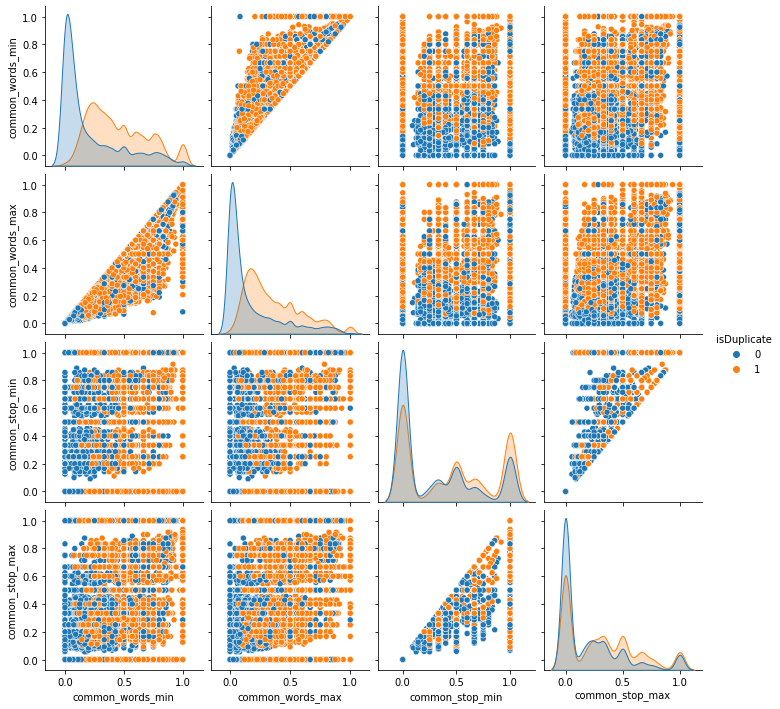

In [ ]:
sns.pairplot(combined_data[['common_words_min', 'common_words_max','common_stop_min', 'common_stop_max', 'isDuplicate']],hue='isDuplicate')

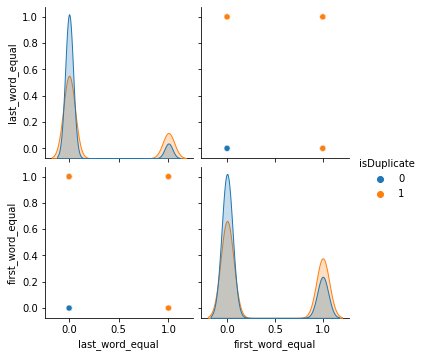

In [ ]:
sns.pairplot(combined_data[['last_word_equal', 'first_word_equal', 'isDuplicate']],hue='isDuplicate')

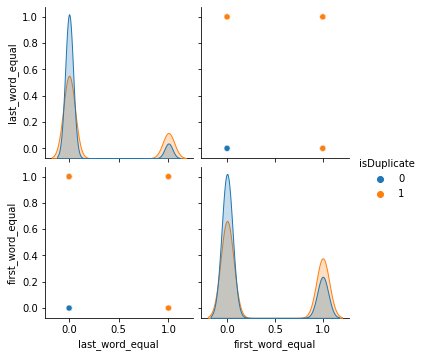

In [ ]:
sns.pairplot(combined_data[['last_word_equal', 'first_word_equal', 'isDuplicate']],hue='isDuplicate')

In [ ]:
questions = list(combined_data['question1']) + list(combined_data['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= combined_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= combined_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [ ]:
combined_data.columns

Index(['question1', 'question2', 'isDuplicate', 'q1len', 'q2len',
       'q1_no_words', 'q2_no_words', 'common_words', 'total_words',
       'shared_words', 'common_words_min', 'common_words_max',
       'common_stop_min', 'common_stop_max', 'common_token_min',
       'common_token_max', 'last_word_equal', 'first_word_equal', 'abs_length',
       'mean_length', 'longest_substring_ratio'],
      dtype='object')

In [ ]:
advanced_feature_columns = ['isDuplicate','q1len', 'q2len',
       'q1_no_words', 'q2_no_words', 'common_words', 'total_words',
       'shared_words', 'common_words_min', 'common_words_max',
       'common_stop_min', 'common_stop_max', 'common_token_min',
       'common_token_max', 'last_word_equal', 'first_word_equal', 'abs_length',
       'mean_length', 'longest_substring_ratio']


combined_data_adv_features = pd.concat([combined_data[advanced_feature_columns], temp_df], axis=1)

In [ ]:
combined_data_adv_features.head()

,isDuplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,shared_words,common_words_min,common_words_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
23559,0,378,354,56,47,2,83,0.02,0.054054,0.045454,...,0,0,0,0,0,0,0,0,0,0
31995,1,364,160,54,25,8,62,0.13,0.388887,0.175000,...,0,0,0,0,0,0,0,0,0,0
10659,1,142,179,20,28,2,39,0.05,0.142856,0.095238,...,0,0,0,0,0,0,0,0,0,0
162925,1,45,69,8,13,5,21,0.24,0.499992,0.374995,...,0,0,0,0,0,0,0,0,0,0
225698,1,41,50,7,10,3,17,0.18,0.499992,0.428565,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(combined_data_adv_features.iloc[:,1:].values,combined_data_adv_features.iloc[:,0].values,test_size=0.2,random_state=101)

The accuracy score for duplicate question detection using Random Forest is 0.838333

The precision score for duplicate question detection using Random Forest is 0.806854

The recall score for duplicate question detection using Random Forest is 0.880952

The f1 score for duplicate question detection using Random Forest is 0.842276

[[244  62]
 [ 35 259]]


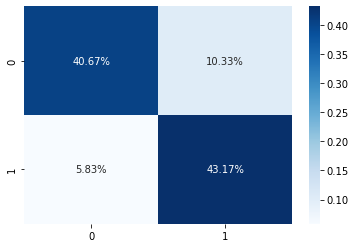

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

print_metrics(y_test,y_pred,modeltype='Random Forest')

In [ ]:
## Saving the Random Forest Model along with the vectorizer

pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

pickle.dump(cv, open('cv_model.pkl', 'wb'))

# with open(filename, 'wb') as fout:
#     pickle.dump((movieVzer, movieTfmer, clf), fout)


The accuracy score for duplicate question detection using xgb_model is 0.838333

The precision score for duplicate question detection using xgb_model is 0.806854

The recall score for duplicate question detection using xgb_model is 0.880952

The f1 score for duplicate question detection using xgb_model is 0.842276

[[244  62]
 [ 35 259]]


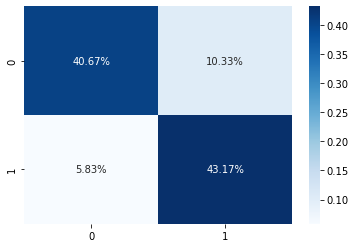

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred1 = xgb_model.predict(X_test)

print_metrics(y_test,y_pred,modeltype='xgb_model')

In [ ]:
## Saving the XGB Model
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))

The accuracy score for duplicate question detection using decision_tree_clf is 0.811833

The precision score for duplicate question detection using decision_tree_clf is 0.800909

The recall score for duplicate question detection using decision_tree_clf is 0.826962

The f1 score for duplicate question detection using decision_tree_clf is 0.813727

[[2405  613]
 [ 516 2466]]


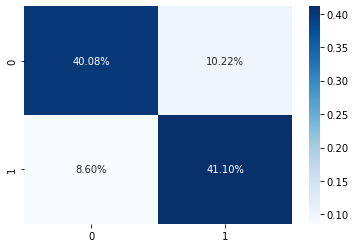

In [ ]:
## Decision Tree Classifier model

decision_tree_clf = DecisionTreeClassifier(random_state=0)

decision_tree_clf.fit(X_train,y_train)
y_pred = decision_tree_clf.predict(X_test)

print_metrics(y_test,y_pred,modeltype='decision_tree_clf')

In [ ]:
## Saving the Decision Tree Model
pickle.dump(decision_tree_clf, open('dt_model.pkl', 'wb'))

Experimenting with Hyper Parameter Tuning for the best models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print(rf_random.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, n_estimators=180)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters={'n_estimators':[1,5,10,50,100],'max_depth':[1,4,5,7,8,10,50]}
model=RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1),tuned_parameters,scoring='neg_log_loss',cv=2)
model.fit(X_train, y_train)
print(model.best_estimator_)

XGBClassifier(eval_metric='logloss', max_depth=4, n_jobs=-1)


The accuracy score for duplicate question detection using Random Forest is 0.845000

The precision score for duplicate question detection using Random Forest is 0.794721

The recall score for duplicate question detection using Random Forest is 0.921769

The f1 score for duplicate question detection using Random Forest is 0.853543

[[236  70]
 [ 23 271]]


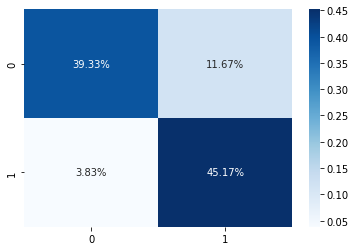

In [ ]:
rf_model = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',min_samples_leaf=4, n_estimators=180)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

print_metrics(y_test,y_pred,modeltype='Random Forest')

The accuracy score for duplicate question detection using xgb_model_tuned is 0.841667

The precision score for duplicate question detection using xgb_model_tuned is 0.813880

The recall score for duplicate question detection using xgb_model_tuned is 0.877551

The f1 score for duplicate question detection using xgb_model_tuned is 0.844517

[[247  59]
 [ 36 258]]


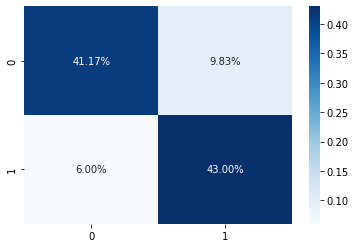

In [ ]:
xgb_model_tuned = XGBClassifier(eval_metric='logloss', max_depth=4, n_jobs=-1)
xgb_model_tuned.fit(X_train,y_train)
y_pred1 = xgb_model_tuned.predict(X_test)

print_metrics(y_test,y_pred1,modeltype='xgb_model_tuned')